
#Text Classification

In [0]:
import spacy

from sklearn.datasets import fetch_20newsgroups  # import packages which help us download dataset and load intp python
from sklearn.pipeline import Pipeline

import numpy as np  # numpy package is for fast numerical computation in Python

In [0]:
# Load the filenames and data from the 20 newsgroups dataset
# This will download the datasets if you don't have them already
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, download_if_missing=True)  
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, download_if_missing=True)

In [0]:
# What is this dataset about? 
#print(twenty_train.description)
twenty_train.description

In [0]:
#twenty_train.data[0]
print(twenty_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [0]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

**Why do we need to convert text to numbers?**

In [0]:
# Extracting features from text files
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
print(f'Shape of Term Frequency Matrix: {X_train_counts.shape}')

Shape of Term Frequency Matrix: (11314, 130107)


In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(f'Shape of TFIDF Matrix: {X_train_tfidf.shape}')

Shape of TFIDF Matrix: (11314, 130107)


In [0]:
# Machine Learning
# Training Naive Bayes (NB) classifier on training data.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [0]:
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
text_nb_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_nb_clf = text_nb_clf.fit(twenty_train.data, twenty_train.target)

In [0]:
predicted = text_nb_clf.predict(twenty_test.data)
naivebayes_clf_accuracy = np.mean(predicted == twenty_test.target)* 100

In [0]:
print(f'Test Accuracy is {naivebayes_clf_accuracy} %')

Test Accuracy is 77.38980350504514 %


In [0]:
from sklearn.linear_model import LogisticRegression as LR

In [0]:
%%time
text_lr_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf',LR())])
text_lr_clf = text_lr_clf.fit(twenty_train.data, twenty_train.target)

CPU times: user 1min 22s, sys: 11.1 s, total: 1min 33s
Wall time: 1min 21s


In [0]:
lr_predicted = text_lr_clf.predict(twenty_test.data)
lr_clf_accuracy = np.mean(lr_predicted == twenty_test.target) * 100.
print(f'Test Accuracy is {lr_clf_accuracy}')

Test Accuracy is 82.74030801911843


In [0]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_true=twenty_test.target, y_pred=lr_predicted)

In [0]:
import json
print(json.dumps(cf.tolist(), indent=2))

[
  [
    237,
    2,
    0,
    0,
    1,
    1,
    4,
    0,
    3,
    3,
    0,
    1,
    2,
    8,
    2,
    33,
    2,
    4,
    1,
    15
  ],
  [
    1,
    307,
    14,
    8,
    8,
    17,
    6,
    1,
    0,
    1,
    0,
    4,
    10,
    1,
    4,
    2,
    1,
    1,
    2,
    1
  ],
  [
    2,
    21,
    289,
    34,
    12,
    11,
    2,
    2,
    2,
    4,
    0,
    1,
    1,
    1,
    3,
    2,
    0,
    0,
    6,
    1
  ],
  [
    0,
    13,
    23,
    284,
    21,
    2,
    14,
    3,
    0,
    1,
    1,
    1,
    24,
    0,
    3,
    0,
    1,
    0,
    0,
    1
  ],
  [
    0,
    5,
    6,
    22,
    319,
    1,
    10,
    0,
    0,
    5,
    1,
    0,
    12,
    0,
    1,
    0,
    0,
    0,
    3,
    0
  ],
  [
    0,
    43,
    38,
    5,
    4,
    292,
    3,
    0,
    0,
    0,
    0,
    1,
    3,
    2,
    4,
    0,
    0,
    0,
    0,
    0
  ],
  [
    0,
    3,
    2,
    12,
    7,
    0,
    351,
    3,
    2,
    1,
  

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

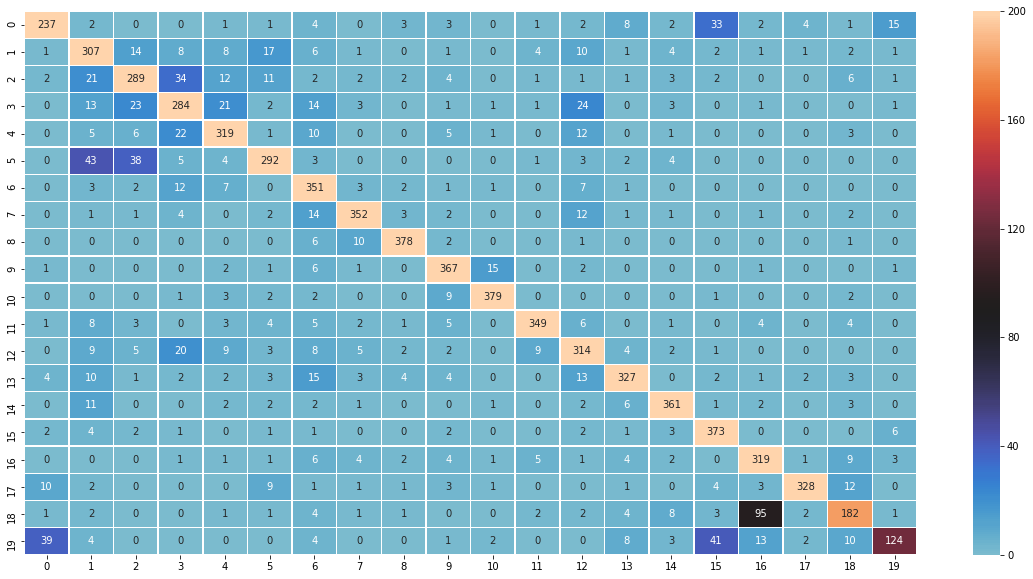

In [0]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(cf, annot=True, fmt="d",linewidths=.5, center = 90, vmax = 200)

##Tricks of Trade

Removing Stop Words

**If there is an error above, try:**

Windows:python -m spacy download en as Administrator

Linux:sudo python -m spacy download en

In [0]:
nlp = spacy.load('en')

#Exploring spaCy

In [0]:
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [0]:
f'There are {len(STOP_WORDS)} stopwords in spaCy'

'There are 326 stopwords in spaCy'

In [0]:
# You can add your own corpora specific STOPWORDS using the .add syntax
STOP_WORDS.add("your_additional_stop_word_here")
f'After adding your own stop words, spaCy will use {len(STOP_WORDS)} stopwords'

'After adding your own stop words, spaCy will use 327 stopwords'

In [0]:
doc = nlp("I am learning the most important ideas Natural Language Processing ideas using Python")
print(doc)  # doc is a spaCy object which stores the entire document string

I am learning the most important ideas Natural Language Processing ideas using Python


**About spaCy objects**

In [0]:
for token in doc:
    print(token)

I
am
learning
the
most
important
ideas
Natural
Language
Processing
ideas
using
Python


In [0]:
simplified_doc = [token for token in doc if not token.is_punct | token.is_stop]
simplified_doc
# please note that .orth_ attribute returns the unicode string representation of the token

[learning, important, ideas, Natural, Language, Processing, ideas, Python]

We can also check what other things we know about these tags in the simplified_doc:



In [0]:
for token in simplified_doc:
    print(f'Token:{token.orth_}\tLemmatized:{token.lemma_}\tPart-of-Speech-Tag:{token.pos_}')

Token:learning	Lemmatized:learn	Part-of-Speech-Tag:VERB
Token:important	Lemmatized:important	Part-of-Speech-Tag:ADJ
Token:ideas	Lemmatized:idea	Part-of-Speech-Tag:NOUN
Token:Natural	Lemmatized:Natural	Part-of-Speech-Tag:PROPN
Token:Language	Lemmatized:Language	Part-of-Speech-Tag:PROPN
Token:Processing	Lemmatized:Processing	Part-of-Speech-Tag:PROPN
Token:ideas	Lemmatized:idea	Part-of-Speech-Tag:NOUN
Token:Python	Lemmatized:Python	Part-of-Speech-Tag:PROPN


**Integrating back with our classifier pipeline**

In [0]:
??CountVectorizer

In [0]:
from spacy.lang.en import English
tokenizer = English().Defaults.create_tokenizer(nlp)
def spacy_tokenizer(document):
    return [token.orth_ for token in tokenizer(document)]

In [0]:
%%time
text_lr_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf',LR())])
text_lr_clf = text_lr_clf.fit(twenty_train.data, twenty_train.target)

CPU times: user 1min 26s, sys: 10.5 s, total: 1min 36s
Wall time: 1min 24s


In [0]:
def calc_print_accuracy(text_clf, test):
    predictions = text_clf.predict(test.data)
    clf_accuracy = np.mean(predictions == test.target) * 100.
    print(f'Test Accuracy is {clf_accuracy}')
    return clf_accuracy

calc_print_accuracy(text_lr_clf, twenty_test)

Test Accuracy is 82.74030801911843


82.74030801911843

In [0]:
%%time
text_lr_clf = Pipeline([('vect', CountVectorizer(tokenizer=spacy_tokenizer, stop_words=list(STOP_WORDS))), ('tfidf', TfidfTransformer()), ('clf',LR())])
text_lr_clf = text_lr_clf.fit(twenty_train.data, twenty_train.target)
calc_print_accuracy(text_lr_clf, twenty_test)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'd', 'll', 'm', 've', '‘', '’'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Test Accuracy is 78.0138077535847
CPU times: user 2min 53s, sys: 12.6 s, total: 3min 6s
Wall time: 2min 53s
